In [1]:
from steps import preprocess
import models.elec_motor_model as elecmotmod
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils as u

from visualization import papermode
papermode(plt, size=12)

In [2]:
abbr = "M01"
preprocess(abbr)
emm_df = elecmotmod.emm_main(abbr);

figs_path = u.get_figdir(u.get_basename(u.get_filename(abbr))) / "elecmotmod";

cmap = plt.get_cmap("turbo")

M01 : Exported merged CSV in data/runs/M01/elec/M01_2022-09-14-19-01-10-AP-LinParking01_elec_motor_data.csv
Primary topic : mcu_status
M01 : Exported merged CSV in data/runs/M01/merged/M01_2022-09-14-19-01-10-AP-LinParking01_m.csv
M01 : Exported cut CSV in data/runs/M01/merged/M01_2022-09-14-19-01-10-AP-LinParking01_mc.csv
Constant columns : 20
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/position/z', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/warthog_vel

In [3]:
emm_df.columns.values

array(['time', 'time_rel', 'vx', 'vy', 'vz', 'w_z', 'current', 'voltage',
       'ax', 'ay', 'az', 'theta', 'qw', 'qx', 'qy', 'qz', 'cmd_v',
       'cmd_w', 'wL', 'wR', 'I_L', 'I_R', 'V_L', 'V_R', 'I_L_orig',
       'I_R_orig', 'temp_L', 'temp_R', 'lat', 'long', 'alt', 'ax_corr',
       'ay_corr', 'az_corr', 'pitch', 'P_total', 'P_L', 'P_R', 'P_mot',
       'P_log', 'v', 'a', 'dI_L', 'dI_R', 'dt', 'dILdt', 'dIRdt'],
      dtype=object)

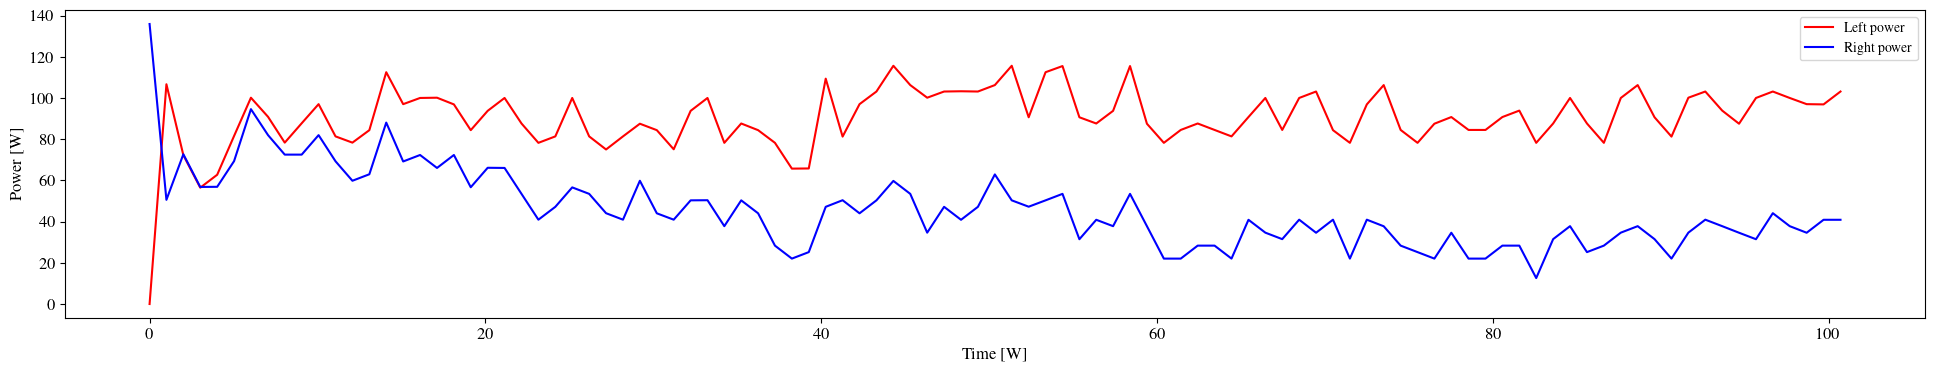

In [4]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel, emm_df.P_L, "r", label="Left power")
ax.plot(emm_df.time_rel, emm_df.P_R, "b", label="Right power")
ax.set_ylabel("Power [W]")
ax.set_xlabel("Time [W]")
ax.legend()

(6.4291015625, 142.0513671875, -5.78125, 121.40625)

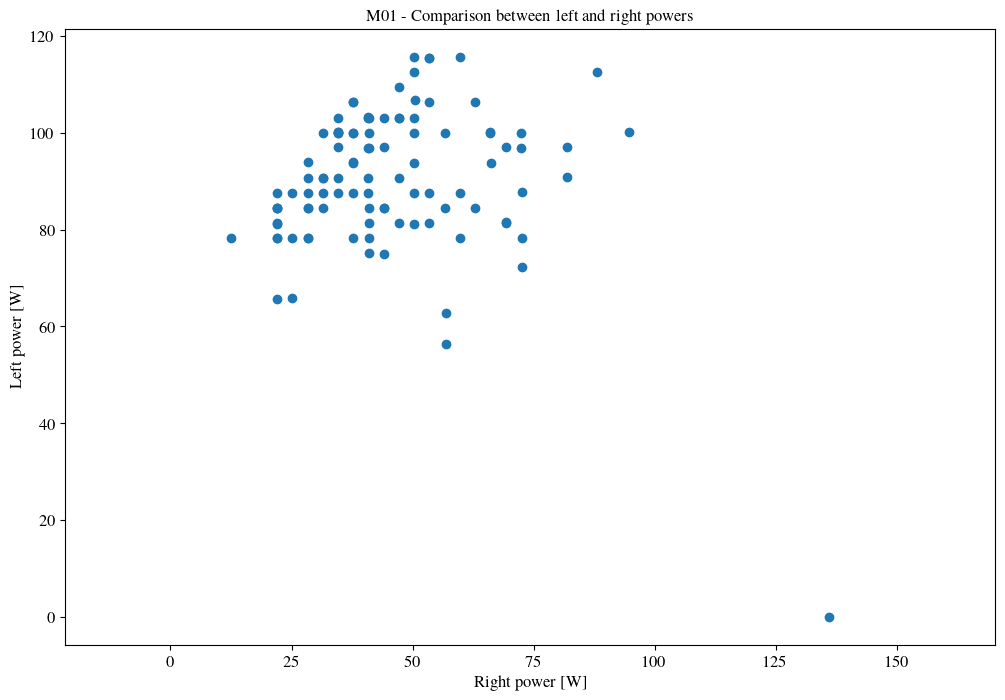

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(emm_df.P_R, emm_df.P_L, "o")
ax.set_title(f"{abbr} - Comparison between left and right powers")
ax.set_ylabel("Left power [W]")
ax.set_xlabel("Right power [W]")
ax.axis('equal')

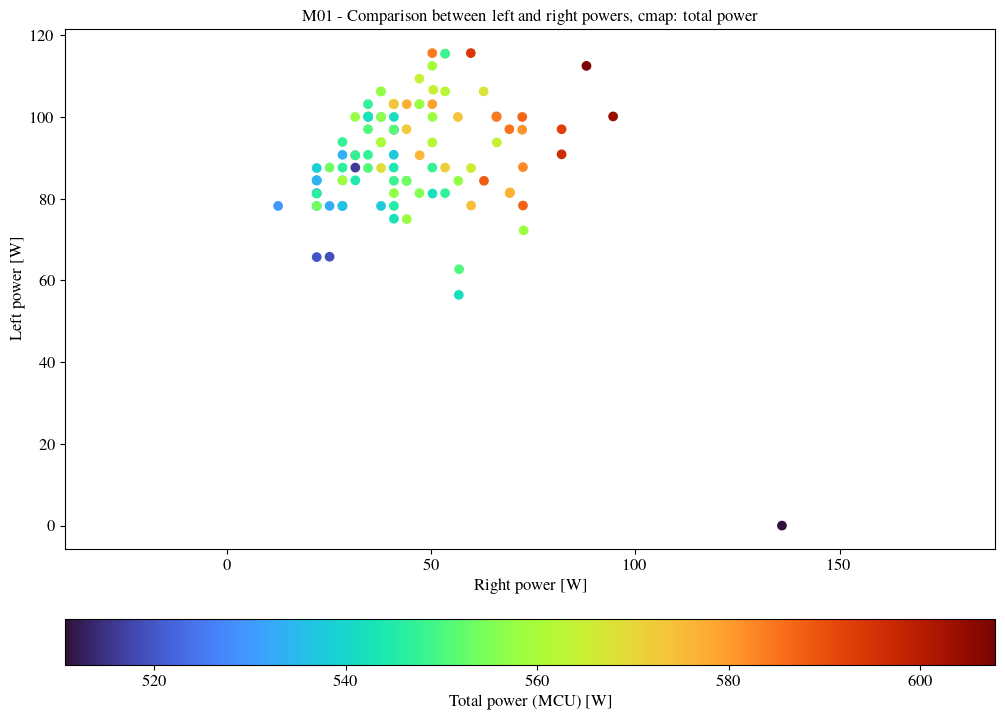

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))
sc = ax.scatter(emm_df.P_R, emm_df.P_L, c=emm_df.P_total, cmap=cmap)
ax.set_title(f"{abbr} - Comparison between left and right powers, cmap: total power")
ax.set_ylabel("Left power [W]")
ax.set_xlabel("Right power [W]")
ax.axis('equal')
cb = fig.colorbar(sc, orientation="horizontal", pad=0.1);
cb.ax.set_xlabel("Total power (MCU) [W]");

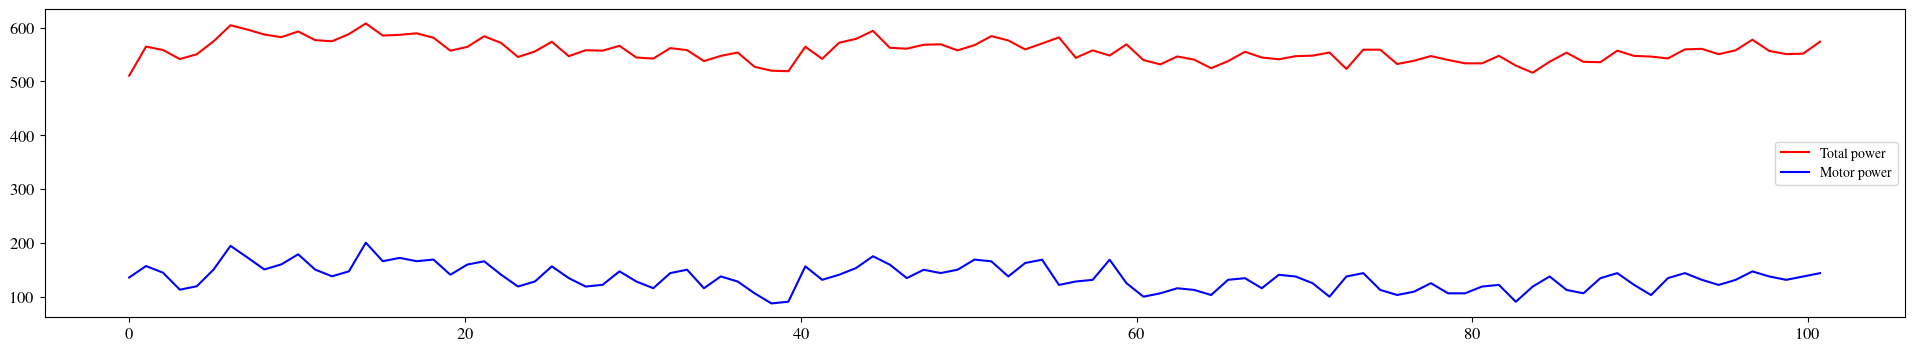

In [7]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel, emm_df.P_total, "r", label="Total power")
ax.plot(emm_df.time_rel, emm_df.P_mot, "b", label="Motor power")
ax.legend()


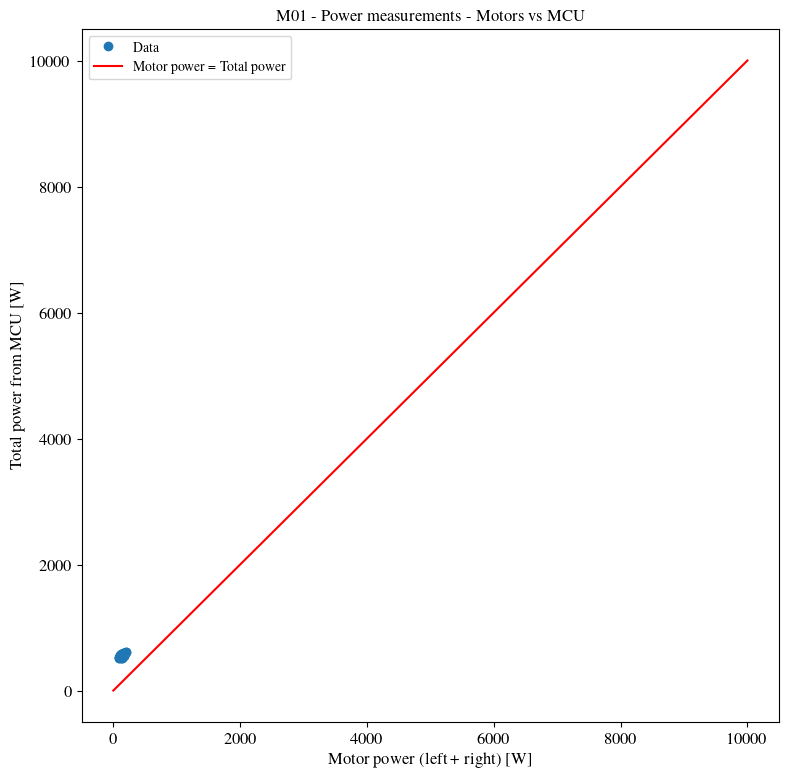

In [8]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(emm_df.P_mot, emm_df.P_total, "o", label="Data")
ax.plot([0, 10000], [0, 10000], "r", label="Motor power = Total power")
ax.set_xlabel("Motor power (left + right) [W]")
ax.set_ylabel("Total power from MCU [W]")
ax.set_title(f"{abbr} - Power measurements - Motors vs MCU")
ax.legend()
fig.savefig(figs_path / f"{abbr}_power_balance.jpg")


<AxesSubplot: >

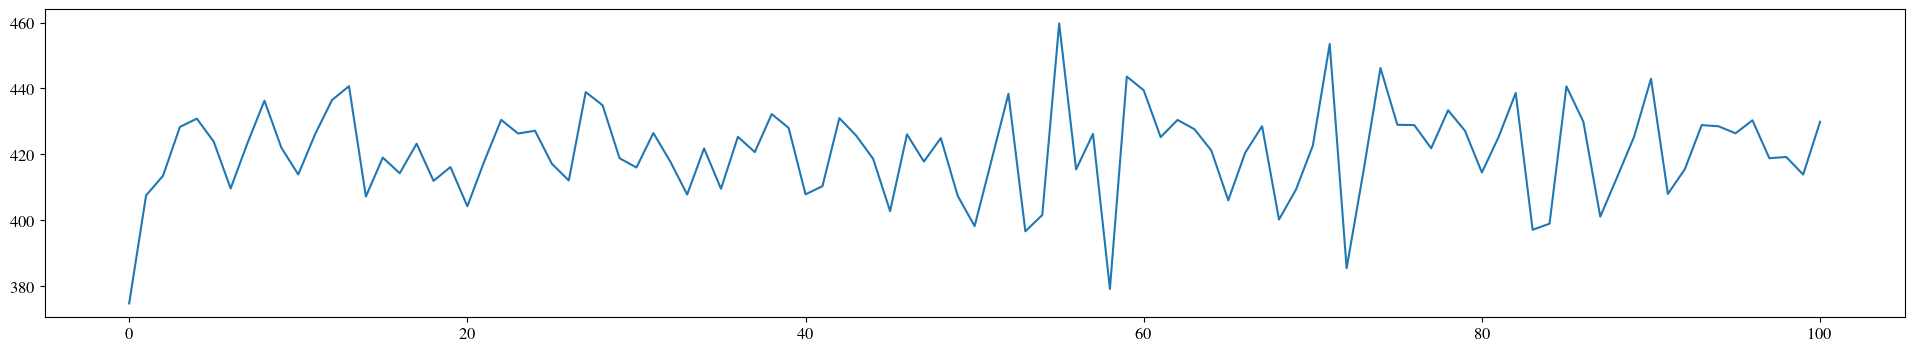

In [9]:
emm_df.P_log.plot(figsize=(24, 4))

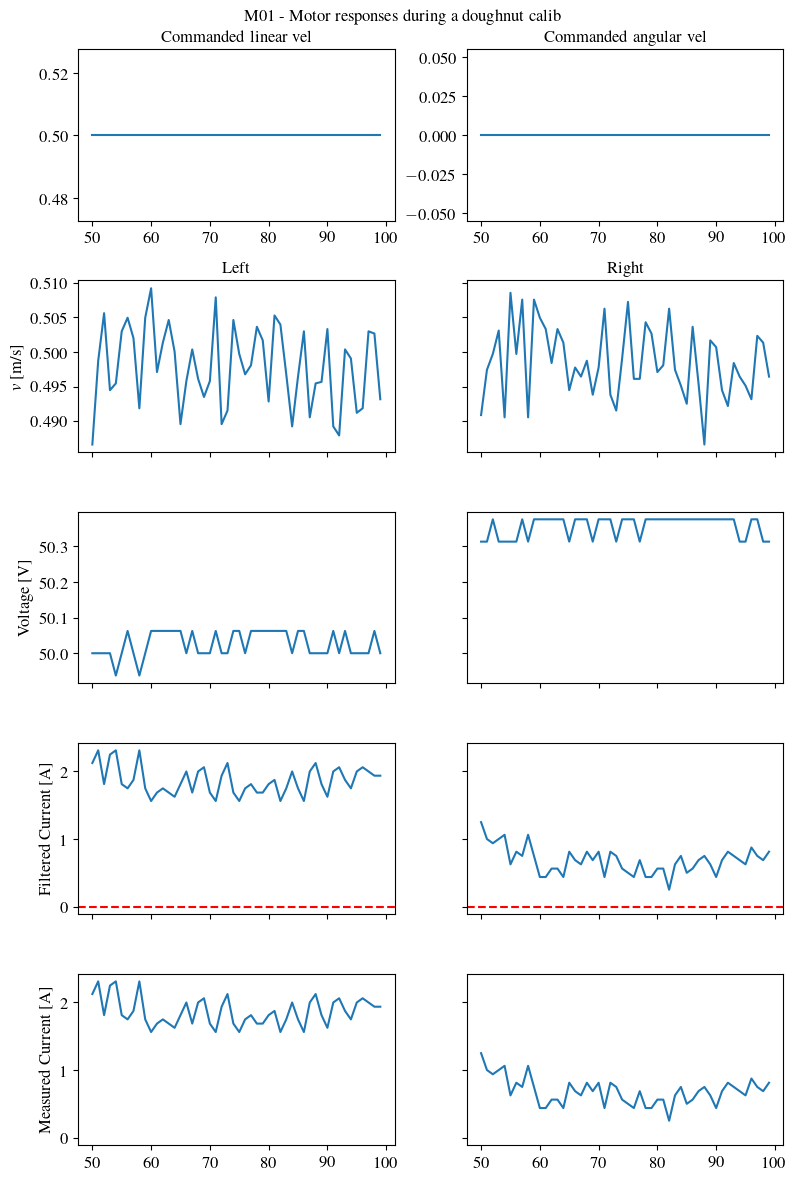

In [10]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.iloc[50:100].plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.iloc[50:100].plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

(emm_df.wL * elecmotmod.ELECM_CONST.r).iloc[50:100].plot(ax=axs[2])
emm_df.V_L.iloc[50:100].plot(ax=axs[4])
emm_df.I_L.iloc[50:100].plot(ax=axs[6])
emm_df.I_L_orig.iloc[50:100].plot(ax=axs[8])

(emm_df.wR * elecmotmod.ELECM_CONST.r).iloc[50:100].plot(ax=axs[3])
emm_df.V_R.iloc[50:100].plot(ax=axs[5])
emm_df.I_R.iloc[50:100].plot(ax=axs[7])
emm_df.I_R_orig.iloc[50:100].plot(ax=axs[9])

axs[6].axhline(y=0, linestyle="--", color="r")
axs[7].axhline(y=0, linestyle="--", color="r")


axs[2].set_title("Left")
axs[3].set_title("Right")

axs[2].set_ylabel("$v$ [m/s]")
axs[4].set_ylabel("Voltage [V]")
axs[6].set_ylabel("Filtered Current [A]")
axs[8].set_ylabel("Measured Current [A]")

axs[8].set_ylim(axs[6].get_ylim())

fig.suptitle(f"{abbr} - Motor responses during a doughnut calib", y=0.98)
fig.tight_layout()

fig.savefig(figs_path / f"{abbr}_doughnut_currents.jpg")

Text(0.5, 0.98, 'M01 - Left motor responses during a doughnut calib')

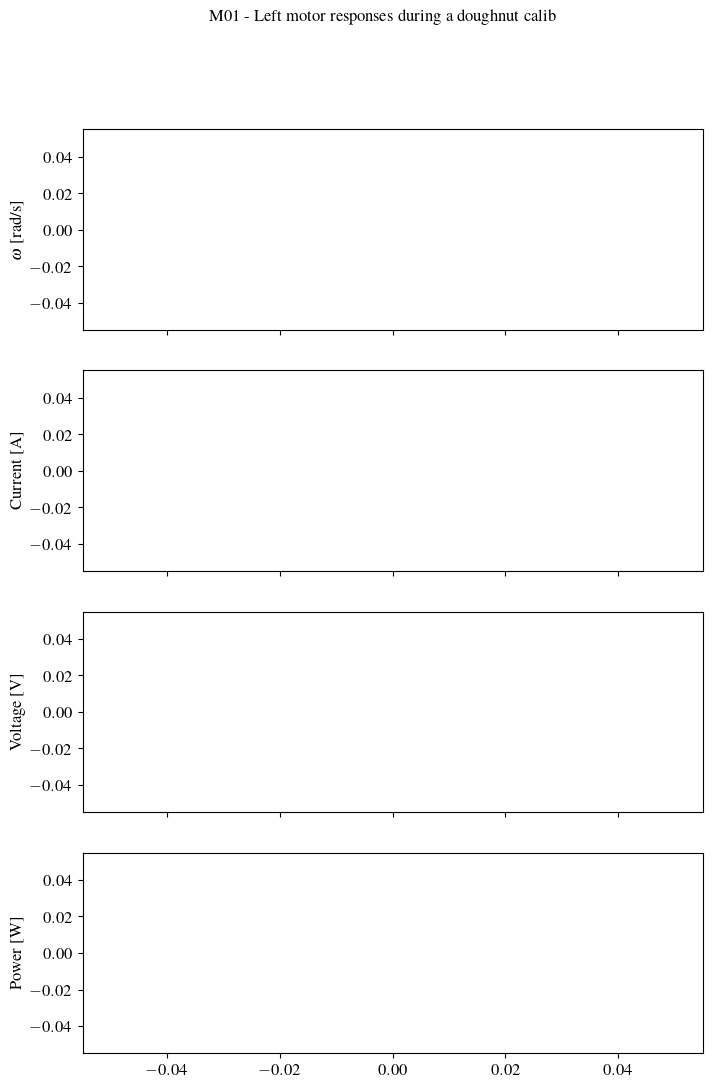

In [11]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

emm_df.wL.iloc[460:525].plot(ax=axs[0])
emm_df.I_L.iloc[460:525].plot(ax=axs[1])
emm_df.V_L.iloc[460:525].plot(ax=axs[2])
emm_df.P_L.iloc[460:525].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$ [rad/s]")
axs[1].set_ylabel("Current [A]")
axs[2].set_ylabel("Voltage [V]")
axs[3].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Left motor responses during a doughnut calib")


Text(0.5, 0.98, 'M01 - Right motor responses during a doughnut calib')

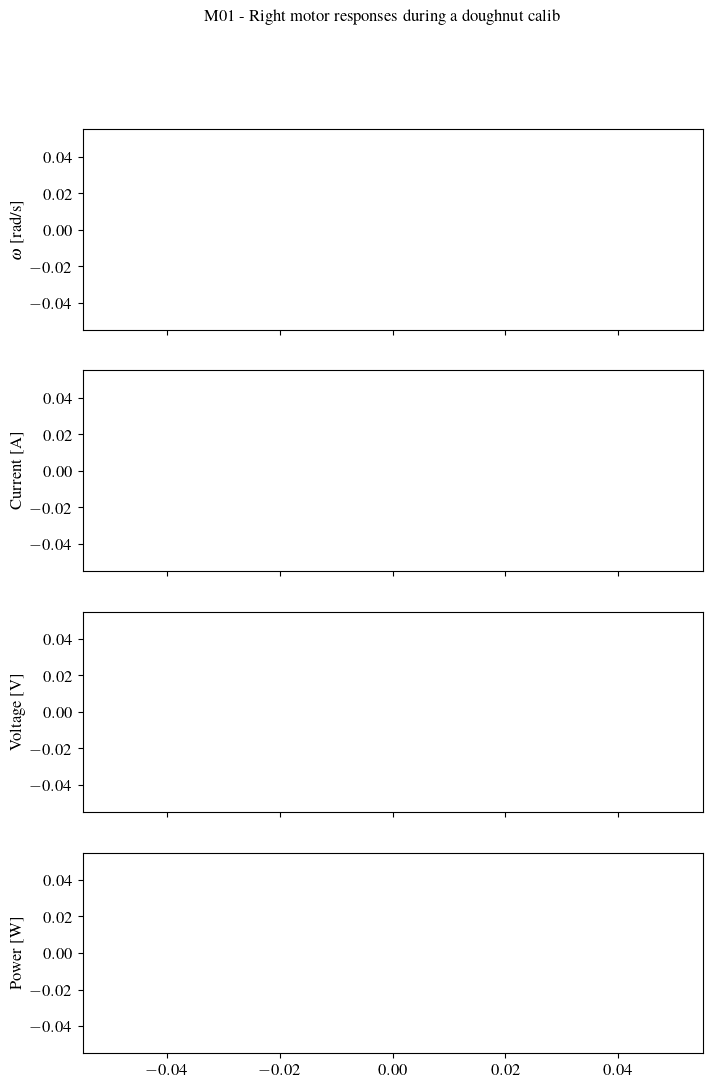

In [12]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

emm_df.wR.iloc[460:525].plot(ax=axs[0])
emm_df.I_R.iloc[460:525].plot(ax=axs[1])
emm_df.V_R.iloc[460:525].plot(ax=axs[2])
emm_df.P_R.iloc[460:525].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$ [rad/s]")
axs[1].set_ylabel("Current [A]")
axs[2].set_ylabel("Voltage [V]")
axs[3].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Right motor responses during a doughnut calib")

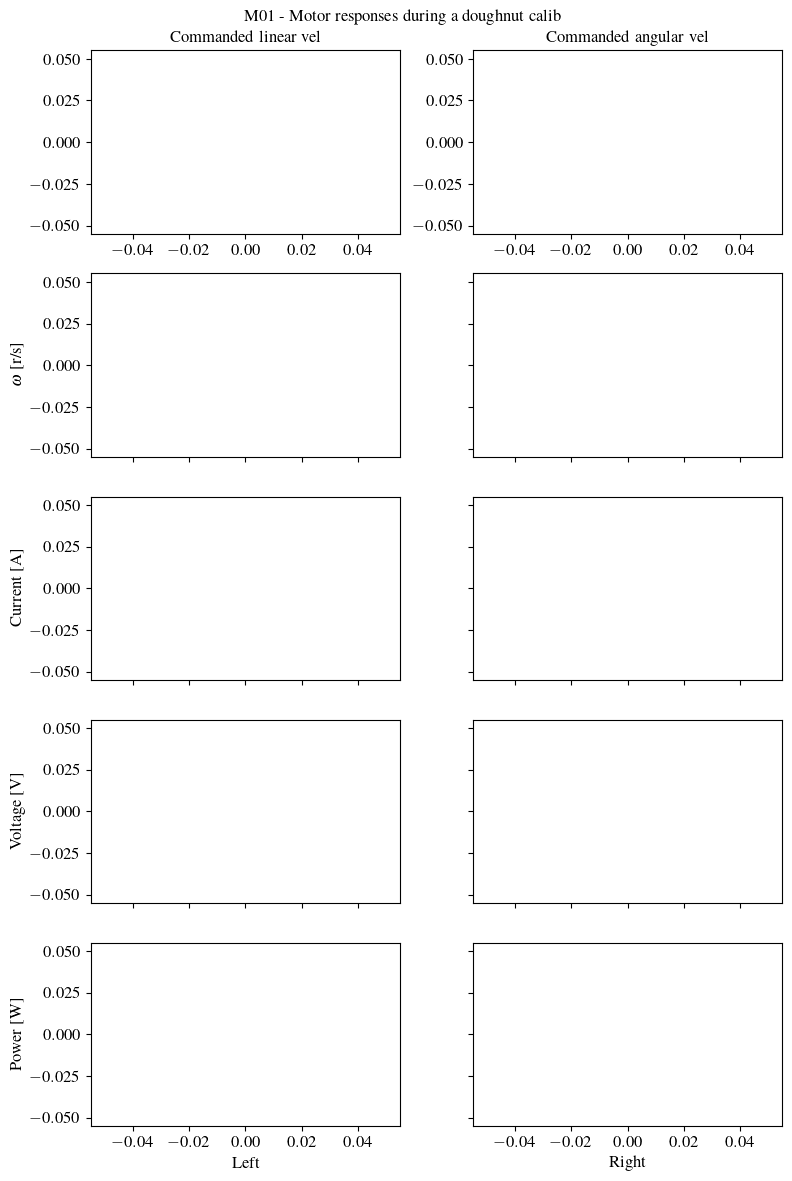

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.iloc[460:525].plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.iloc[460:525].plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

emm_df.wL.iloc[460:525].plot(ax=axs[2])
emm_df.I_L.iloc[460:525].plot(ax=axs[4])
emm_df.V_L.iloc[460:525].plot(ax=axs[6])
emm_df.P_L.iloc[460:525].plot(ax=axs[8])

emm_df.wR.iloc[460:525].plot(ax=axs[3])
emm_df.I_R.iloc[460:525].plot(ax=axs[5])
emm_df.V_R.iloc[460:525].plot(ax=axs[7])
emm_df.P_R.iloc[460:525].plot(ax=axs[9])

axs[8].set_xlabel("Left")
axs[9].set_xlabel("Right")

axs[2].set_ylabel("$\omega$ [r/s]")
axs[4].set_ylabel("Current [A]")
axs[6].set_ylabel("Voltage [V]")
axs[8].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Motor responses during a doughnut calib", y=0.98)
fig.tight_layout()

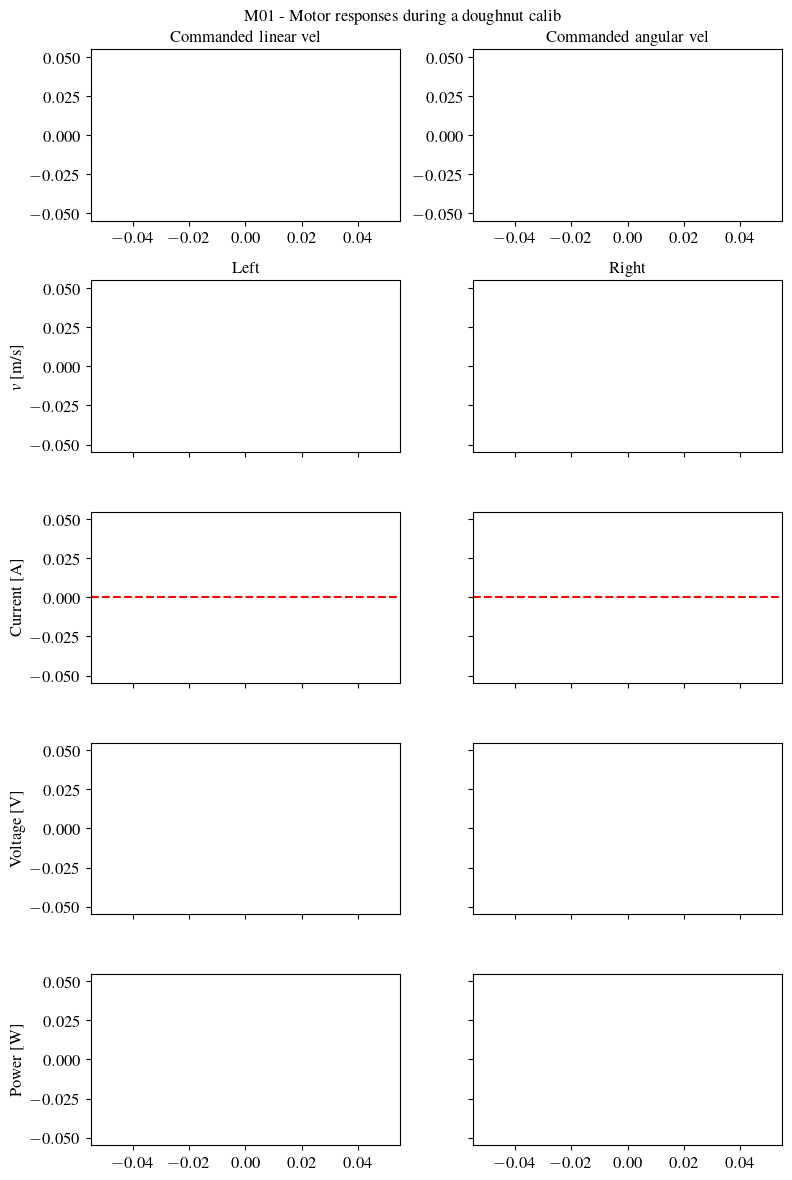

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.iloc[460:525].plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.iloc[460:525].plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

(emm_df.wL * elecmotmod.ELECM_CONST.r).iloc[460:525].plot(ax=axs[2])
emm_df.I_L.iloc[460:525].plot(ax=axs[4])
emm_df.V_L.iloc[460:525].plot(ax=axs[6])
emm_df.P_L.iloc[460:525].plot(ax=axs[8])

(emm_df.wR * elecmotmod.ELECM_CONST.r).iloc[460:525].plot(ax=axs[3])
emm_df.I_R.iloc[460:525].plot(ax=axs[5])
emm_df.V_R.iloc[460:525].plot(ax=axs[7])
emm_df.P_R.iloc[460:525].plot(ax=axs[9])

axs[4].axhline(y=0, linestyle="--", color="r")
axs[5].axhline(y=0, linestyle="--", color="r")


axs[2].set_title("Left")
axs[3].set_title("Right")

axs[2].set_ylabel("$v$ [m/s]")
axs[4].set_ylabel("Current [A]")
axs[6].set_ylabel("Voltage [V]")
axs[8].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Motor responses during a doughnut calib", y=0.98)
fig.tight_layout()

fig.savefig(figs_path / f"{abbr}_doughnut_motors.jpg")

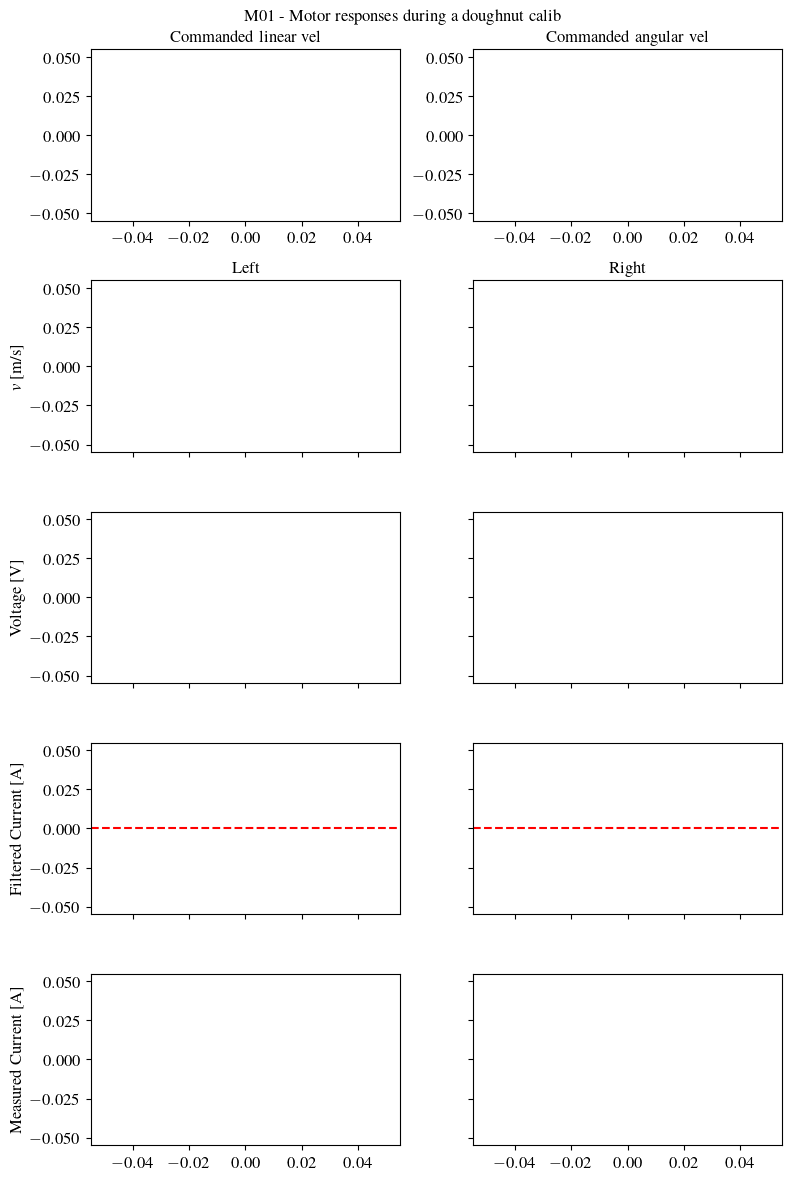

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.iloc[460:525].plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.iloc[460:525].plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

(emm_df.wL * elecmotmod.ELECM_CONST.r).iloc[460:525].plot(ax=axs[2])
emm_df.V_L.iloc[460:525].plot(ax=axs[4])
emm_df.I_L.iloc[460:525].plot(ax=axs[6])
emm_df.I_L_orig.iloc[460:525].plot(ax=axs[8])

(emm_df.wR * elecmotmod.ELECM_CONST.r).iloc[460:525].plot(ax=axs[3])
emm_df.V_R.iloc[460:525].plot(ax=axs[5])
emm_df.I_R.iloc[460:525].plot(ax=axs[7])
emm_df.I_R_orig.iloc[460:525].plot(ax=axs[9])

axs[6].axhline(y=0, linestyle="--", color="r")
axs[7].axhline(y=0, linestyle="--", color="r")


axs[2].set_title("Left")
axs[3].set_title("Right")

axs[2].set_ylabel("$v$ [m/s]")
axs[4].set_ylabel("Voltage [V]")
axs[6].set_ylabel("Filtered Current [A]")
axs[8].set_ylabel("Measured Current [A]")

axs[8].set_ylim(axs[6].get_ylim())

fig.suptitle(f"{abbr} - Motor responses during a doughnut calib", y=0.98)
fig.tight_layout()

fig.savefig(figs_path / f"{abbr}_doughnut_currents.jpg")

Text(0.5, 1.0, 'M01 - Left motor - Velocity vs power')

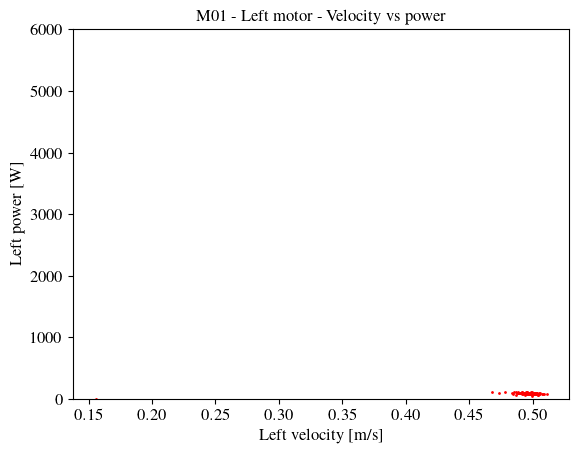

In [16]:
fig, ax = plt.subplots()
ax.plot(emm_df.wL * elecmotmod.ELECM_CONST.r, emm_df.P_L,  "ro", markersize=1)
ax.set_xlabel("Left velocity [m/s]")
ax.set_ylabel("Left power [W]")
ax.set_ylim((0, 6000))
ax.set_title(f"{abbr} - Left motor - Velocity vs power")

Text(0.5, 1.0, 'M01 - Right motor - Velocity vs power')

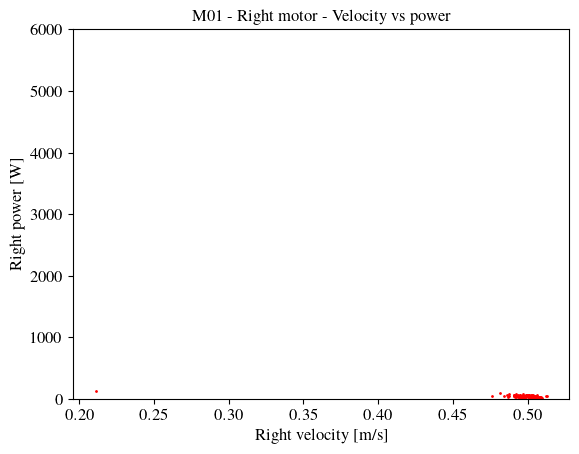

In [17]:
fig, ax = plt.subplots()
ax.plot(emm_df.wR * elecmotmod.ELECM_CONST.r, emm_df.P_R,  "ro", markersize=1)
ax.set_xlabel("Right velocity [m/s]")
ax.set_ylabel("Right power [W]")
ax.set_ylim((0, 6000))
ax.set_title(f"{abbr} - Right motor - Velocity vs power")

Text(0.5, 1.0, 'M01 - Left motor - Temperature vs power')

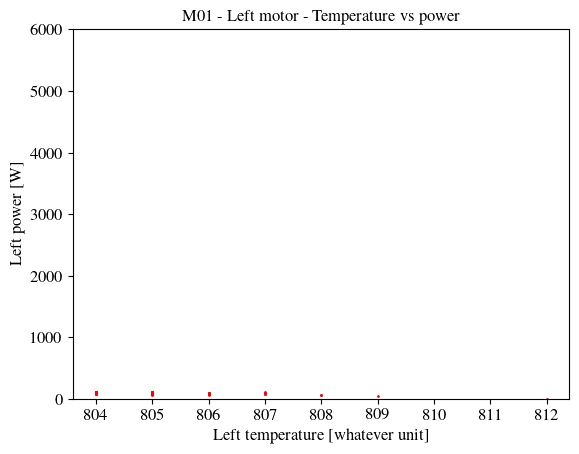

In [18]:
fig, ax = plt.subplots()
ax.plot(emm_df.temp_L, emm_df.P_L,  "ro", markersize=1)
ax.set_xlabel("Left temperature [whatever unit]")
ax.set_ylabel("Left power [W]")
ax.set_ylim((0, 6000))
ax.set_title(f"{abbr} - Left motor - Temperature vs power")

In [19]:
type(emm_df.pitch.iloc[0])

numpy.float64

<AxesSubplot: >

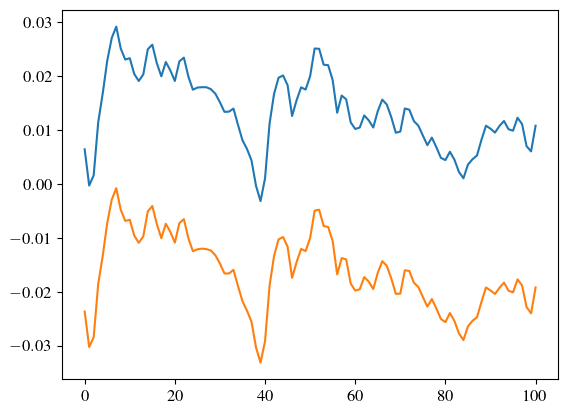

In [20]:
fig, ax = plt.subplots()
(-emm_df.pitch + 0.03).plot(ax=ax)
emm_df.theta.plot(ax=ax)